In [1]:
# Import Packaes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning packages
from sklearn.preprocessing import StandardScaler  # Maybe use MinMaxScaler?
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score


# Prevents Pandas Copy Warning
pd.set_option("mode.copy_on_write", True)
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None)

## Exploratory Data Analysis

In [2]:
folder_path = './data/ieee-fraud-detection/'
train_identity = pd.read_csv(f'{folder_path}train_identity.csv')
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv')
#test_identity = pd.read_csv(f'{folder_path}test_identity.csv')
#test_transaction = pd.read_csv(f'{folder_path}test_transaction.csv')

# let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
#test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [3]:
print(f'Train transaction dataset has {train_transaction.shape[0]} rows and {train_transaction.shape[1]} columns.')
print(f'Train identity dataset has {train_identity.shape[0]} rows and {train_identity.shape[1]} columns.')
print(f'Merged Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')

train.head()

Train transaction dataset has 590540 rows and 394 columns.
Train identity dataset has 144233 rows and 41 columns.
Merged Train dataset has 590540 rows and 434 columns.


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


After loading in the dataset we observe the following:

- There are 590,540 observation and 434 variables.

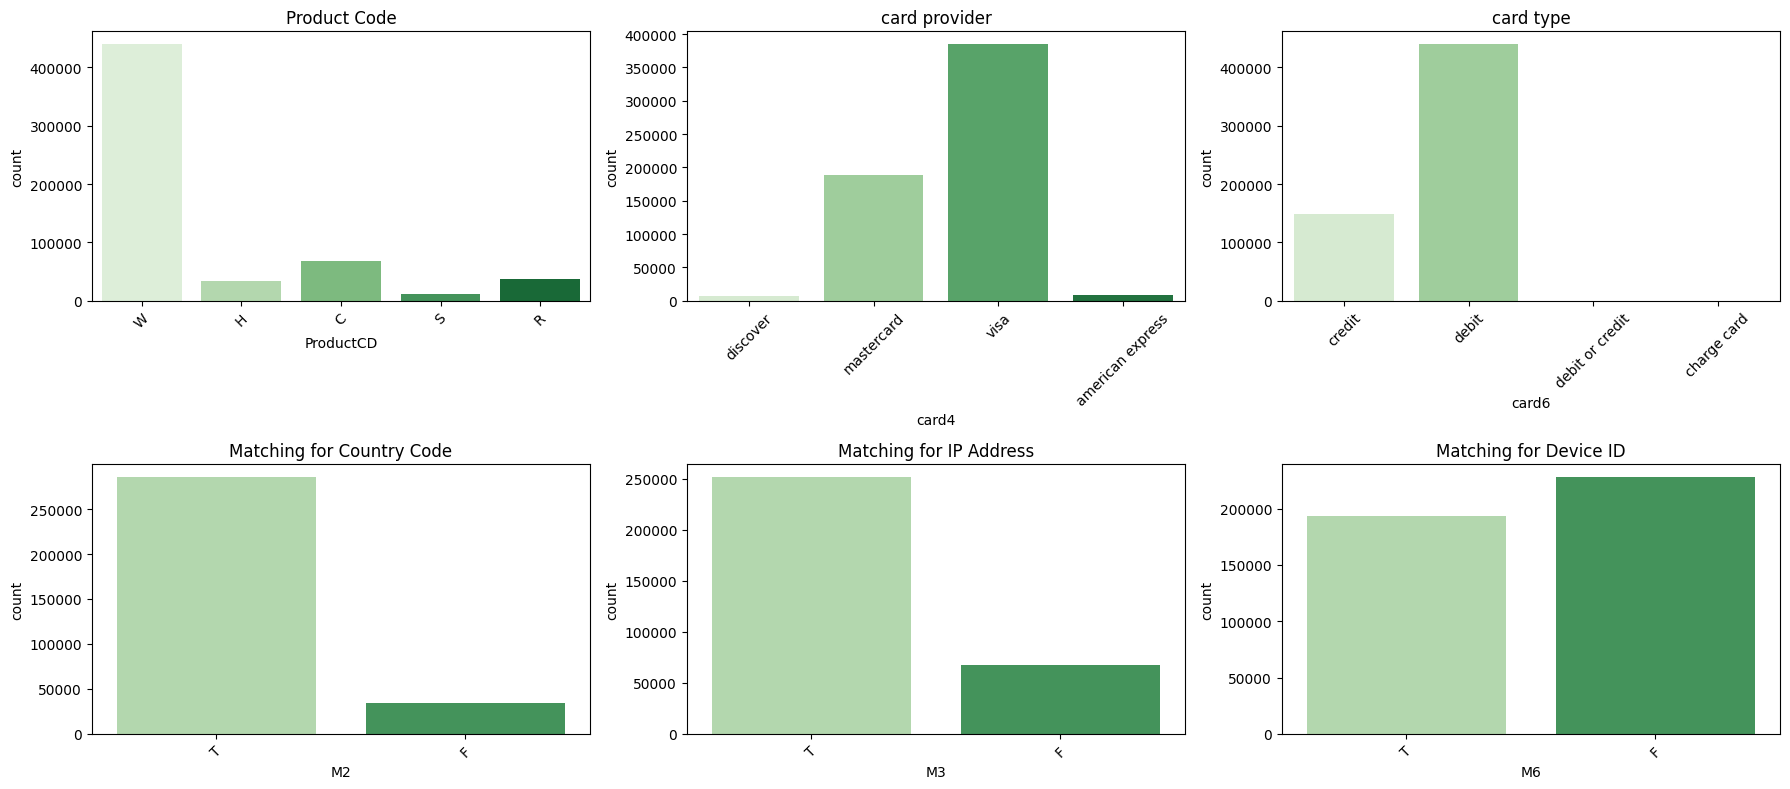

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features to plot
features = ['ProductCD', 'card4', 'card6', 'M2', 'M3', 'M6']

# List of names for each feature (match order with features list)
names = ['Product Code', 'card provider', 'card type', 
         'Matching for Country Code', 'Matching for IP Address', 
         'Matching for Device ID']

# Assuming the train data is already loaded as 'train'
# Set the figure size with a smaller height
plt.figure(figsize=(18, 8))  # Reduced height

# Create subplots to plot each feature's distribution with 6 columns
for i, (feature, name) in enumerate(zip(features, names), 1):
    plt.subplot(2, 3, i)  # Arrange subplots in 2 rows and 6 columns
    sns.countplot(data=train, x=feature, hue=feature, palette='Greens', legend=False)  # Set hue and palette
    plt.title(f'{name}')  # Use the descriptive names from the list
    plt.xticks(rotation=45)  # Rotate x labels for readability
    plt.tight_layout()

# Show the plot
plt.show()

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_13668\2423255624.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['dayofweek'] = (train['TransactionDT']//(60*60*24)-1)%7
C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_13668\2423255624.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes2 = sns.barplot(x=tmp['dayofweek'],y=tmp['Number of transactions'],palette='summer')


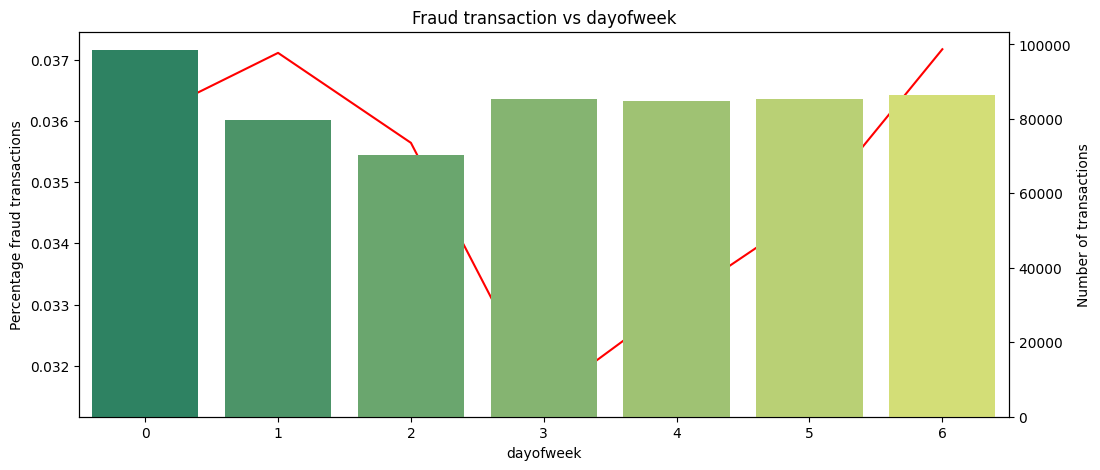

In [5]:
train['dayofweek'] = (train['TransactionDT']//(60*60*24)-1)%7
tmp = train[['isFraud','dayofweek']].groupby(by=['dayofweek']).mean().reset_index() \
            .rename(columns={'isFraud':'Percentage fraud transactions'})

tmp_count = train[['TransactionID','dayofweek']].groupby(by=['dayofweek']).count().reset_index() \
            .rename(columns={'TransactionID':'Number of transactions'})
tmp = tmp.merge(tmp_count,on=['dayofweek'])




fig, axes = plt.subplots(figsize=(12,5))
axes = sns.lineplot(x=tmp['dayofweek'],y=tmp['Percentage fraud transactions'],color='r')
axes2 = axes.twinx()
axes2 = sns.barplot(x=tmp['dayofweek'],y=tmp['Number of transactions'],palette='summer')
axes.set_title('Fraud transaction vs dayofweek')
plt.show()


C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_13668\2591509939.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['hour'] = (train['TransactionDT']//(60*60))%24
C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_13668\2591509939.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes2 = sns.barplot(x=tmp['hour'],y=tmp['Number of transactions'],palette='summer')


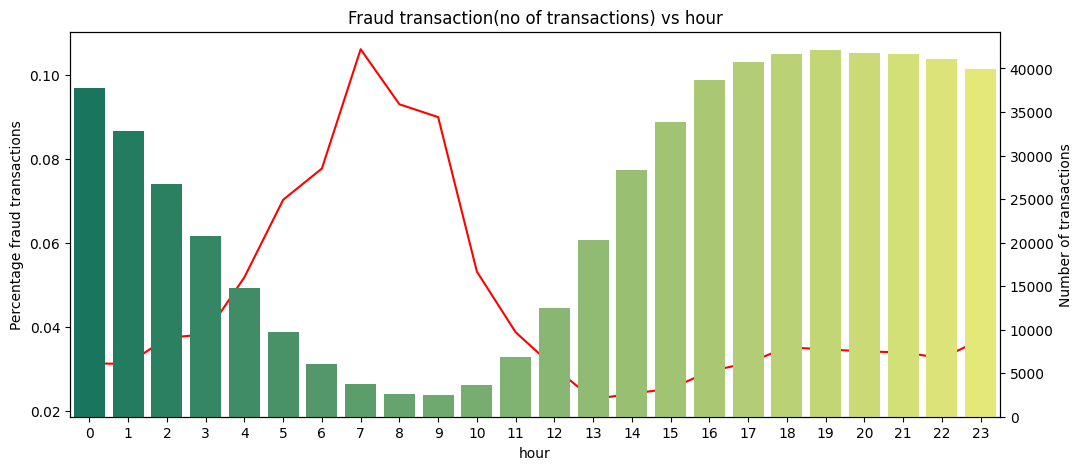

In [6]:
train['hour'] = (train['TransactionDT']//(60*60))%24
tmp = train[['isFraud','hour']].groupby(by=['hour']).mean().reset_index() \
            .rename(columns={'isFraud':'Percentage fraud transactions'})

tmp_count = train[['TransactionID','hour']].groupby(by=['hour']).count().reset_index() \
            .rename(columns={'TransactionID':'Number of transactions'})
tmp = tmp.merge(tmp_count,on=['hour'])




fig, axes = plt.subplots(figsize=(12,5))
axes = sns.lineplot(x=tmp['hour'],y=tmp['Percentage fraud transactions'],color='r')
axes2 = axes.twinx()
axes2 = sns.barplot(x=tmp['hour'],y=tmp['Number of transactions'],palette='summer')
axes.set_title('Fraud transaction(no of transactions) vs hour')
plt.show()

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_13668\3543168159.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dff_notfraud['TransactionAmt'],ax=axes[0],label='not fraud')
C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_13668\3543168159.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

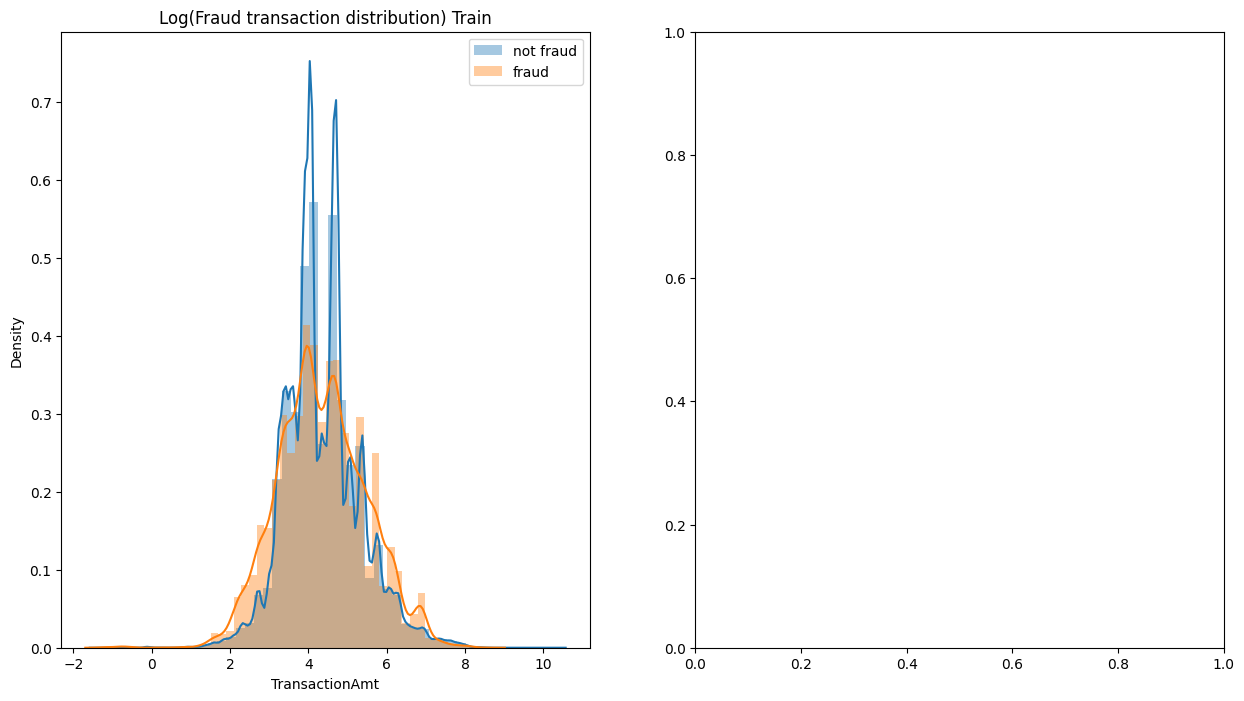

In [7]:
#test_amt = np.log(df_test[['TransactionAmt']])

dff_fraud = train[train['isFraud'] == 1]
dff_notfraud = train[train['isFraud'] == 0]

dff_fraud['TransactionAmt'] = np.log(dff_fraud['TransactionAmt'])
dff_notfraud['TransactionAmt'] = np.log(dff_notfraud['TransactionAmt'])


fig,axes = plt.subplots(1,2,figsize=(15,8))
sns.distplot(dff_notfraud['TransactionAmt'],ax=axes[0],label='not fraud')
sns.distplot(dff_fraud['TransactionAmt'],ax=axes[0],label='fraud')
axes[0].title.set_text('Log(Fraud transaction distribution) Train')
axes[0].legend()

#sns.distplot(test_amt,ax=axes[1])
#axes[1].title.set_text('Log(Fraud transaction distribution) Test')
plt.show()

In [8]:
'''
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10,8))
sns.boxplot(dff_notfraud['TransactionAmt'],ax=axes[0])
axes[0].title.set_text('Log(Non Fraud transaction distribution)')
axes[0].set(xlim=(0, 12))
sns.boxplot(dff_fraud['TransactionAmt'],ax=axes[1],color=colors[2])
axes[1].title.set_text('Log(Fraud transaction distribution)')
axes[1].set(xlim=(0, 12))
plt.show()

print('Mean transaction amt for fraud is {:.4f} ie, {:.4f} dollars'.format(dff_fraud['TransactionAmt'].mean(),np.exp(dff_fraud['TransactionAmt'].mean())))
print('Mean transaction amt for non-fraud is {:.4f} ie, {:.4f} dollars'.format(dff_notfraud['TransactionAmt'].mean(),np.exp(dff_notfraud['TransactionAmt'].mean())))

print('Median transaction amt for fraud is {:.4f}  ie, {:.4f} dollars'.format(dff_fraud['TransactionAmt'].median(),np.exp(dff_fraud['TransactionAmt'].median())))
print('Median transaction amt for non-fraud is {:.4f}  ie, {:.4f} dollars'.format(dff_notfraud['TransactionAmt'].median(),np.exp(dff_notfraud['TransactionAmt'].median())))
'''

"\nfig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10,8))\nsns.boxplot(dff_notfraud['TransactionAmt'],ax=axes[0])\naxes[0].title.set_text('Log(Non Fraud transaction distribution)')\naxes[0].set(xlim=(0, 12))\nsns.boxplot(dff_fraud['TransactionAmt'],ax=axes[1],color=colors[2])\naxes[1].title.set_text('Log(Fraud transaction distribution)')\naxes[1].set(xlim=(0, 12))\nplt.show()\n\nprint('Mean transaction amt for fraud is {:.4f} ie, {:.4f} dollars'.format(dff_fraud['TransactionAmt'].mean(),np.exp(dff_fraud['TransactionAmt'].mean())))\nprint('Mean transaction amt for non-fraud is {:.4f} ie, {:.4f} dollars'.format(dff_notfraud['TransactionAmt'].mean(),np.exp(dff_notfraud['TransactionAmt'].mean())))\n\nprint('Median transaction amt for fraud is {:.4f}  ie, {:.4f} dollars'.format(dff_fraud['TransactionAmt'].median(),np.exp(dff_fraud['TransactionAmt'].median())))\nprint('Median transaction amt for non-fraud is {:.4f}  ie, {:.4f} dollars'.format(dff_notfraud['TransactionAmt'].median(),np.exp

In [9]:
def top_missing_cols(df,n=10,thresh=80):
    """
    returns missing columns in dataframe with missing values percent > thresh
    if n=None. It will gave whole dataframe with missing values percent > thresh
    """
    
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["missing_percent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return dff.head(n)
    else:
        return dff

In [10]:
from ydata_profiling import ProfileReport
'''

# Generate the profile report
profile = ProfileReport(
    train,
    title="IEEE Fraud Detection Dataset Report",
    minimal=True,  # Faster report with essential information
    explorative=True,  # Adds interactive visualizations for large dataframes
    vars={
        "cat": {
            "check_impact": False,  # Focus on categorical proportions without additional impact metrics
            "count": True,          # Display counts and nulls for categorical variables
        },
        "num": {
            "quantile": True,  # Display quantile-based statistics for continuous variables
        }
    }
)

# Save the report as an HTML file
#profile.to_file("ieee_fraud_detection_report.html")
'''

'\n\n# Generate the profile report\nprofile = ProfileReport(\n    train,\n    title="IEEE Fraud Detection Dataset Report",\n    minimal=True,  # Faster report with essential information\n    explorative=True,  # Adds interactive visualizations for large dataframes\n    vars={\n        "cat": {\n            "check_impact": False,  # Focus on categorical proportions without additional impact metrics\n            "count": True,          # Display counts and nulls for categorical variables\n        },\n        "num": {\n            "quantile": True,  # Display quantile-based statistics for continuous variables\n        }\n    }\n)\n\n# Save the report as an HTML file\n#profile.to_file("ieee_fraud_detection_report.html")\n'

In [11]:
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Separate target and drop 'TransactionID' column
y = train['isFraud']
X = train.drop(columns=['isFraud', 'TransactionID'])

# Step 1: Filter out columns with >25% missing values
missing_percentages = X.isnull().mean() * 100
X_filtered = X.loc[:, missing_percentages <= 25]

# Step 2: Impute missing values before encoding
for column in X_filtered.columns:
    if X_filtered[column].dtype == 'float64' or X_filtered[column].dtype == 'int64':  # Continuous variables
        X_filtered[column] = X_filtered[column].fillna(X_filtered[column].median())
    else:  # Categorical variables
        X_filtered[column] = X_filtered[column].fillna(X_filtered[column].mode()[0])

# Step 3: Encode categorical features
X_encoded = pd.get_dummies(X_filtered, drop_first=True)

# Step 4: Split the data for training (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_13668\1483842288.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='feature', x='importance', palette='Greens_d')


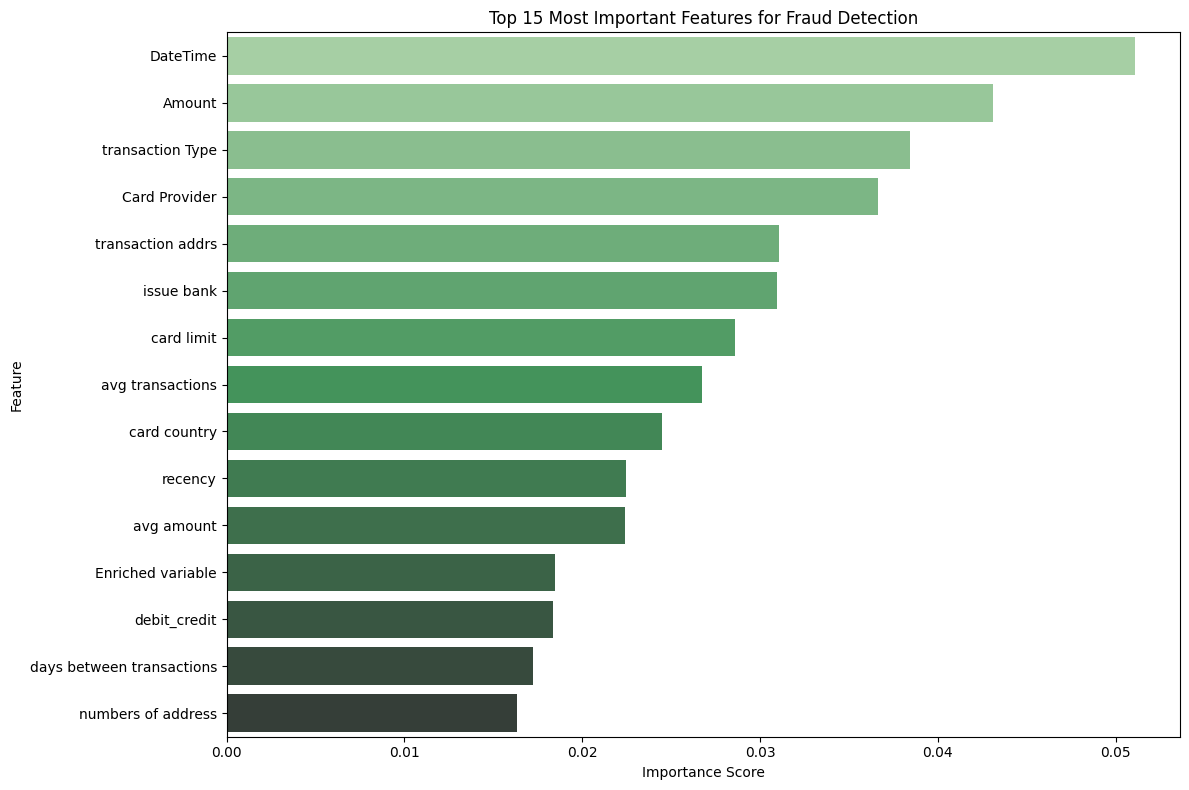

In [13]:
# Step 6: Calculate feature importances
#importances = rf.feature_importances_
#feature_names = X_encoded.columns

# Create a DataFrame with feature importances
#importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort by importance and select the top 25 features
#top_features = importance_df.sort_values(by='importance', ascending=False).head(15)
#top_features_names = ['DateTime', 'Amount', 'transaction Type', 'Card Provider', 'transaction addrs','issue bank','card limit','avg transactions', 'card country', 'recency','avg amount', 'Enriched variable', 'debit_credit', 'days between transactions', 'numbers of address']

# Plot the top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(data=top_features, y='feature', x='importance', palette='Greens_d')

# Replace y-tick labels with `top_features_names`
plt.yticks(ticks=range(len(top_features_names)), labels=top_features_names)

plt.title("Top 15 Most Important Features for Fraud Detection")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


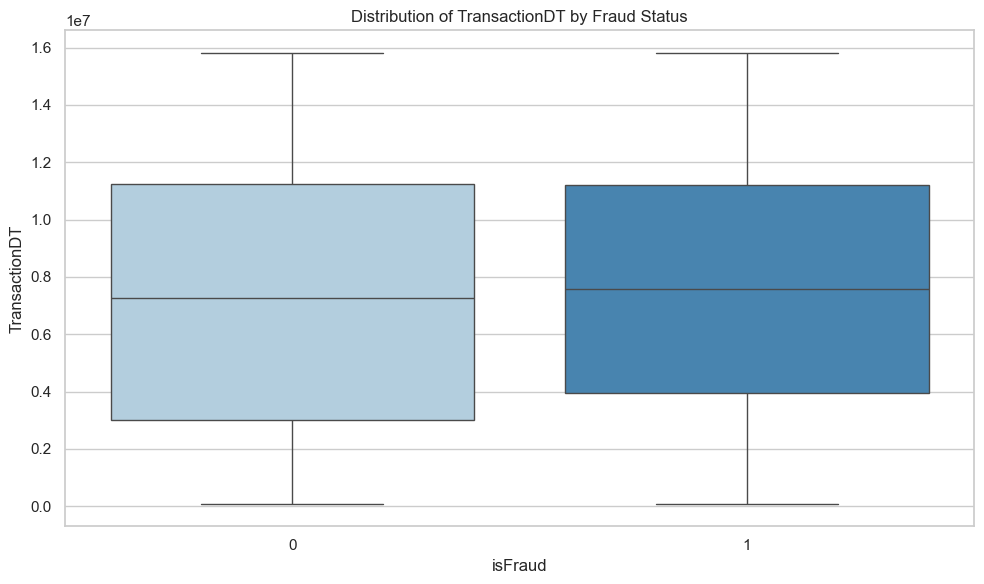

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


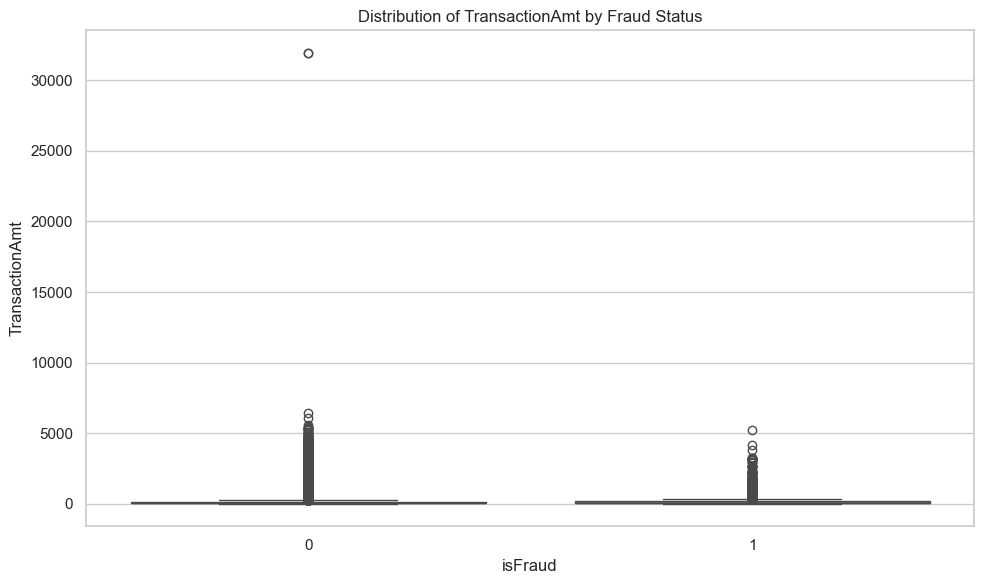

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


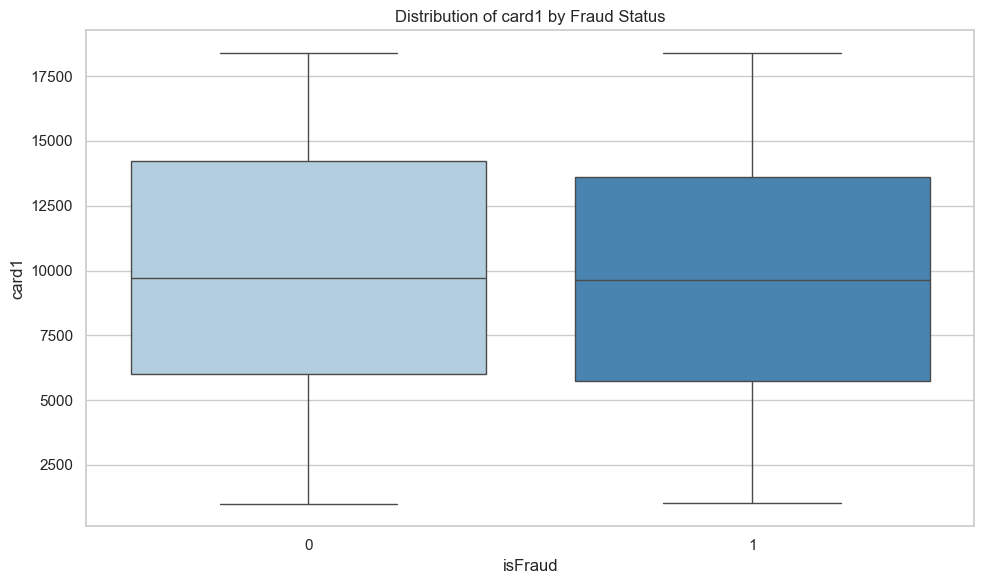

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


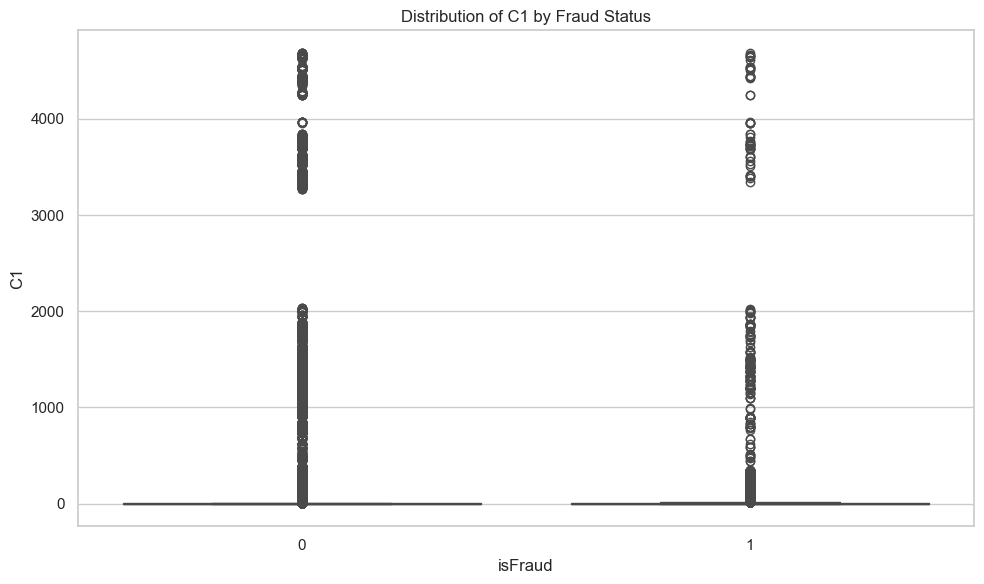

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


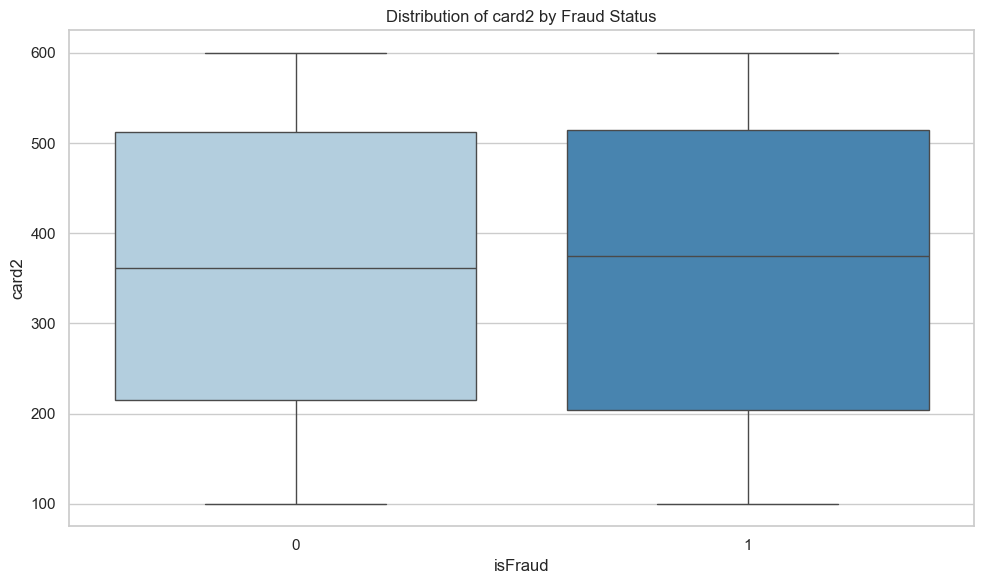

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


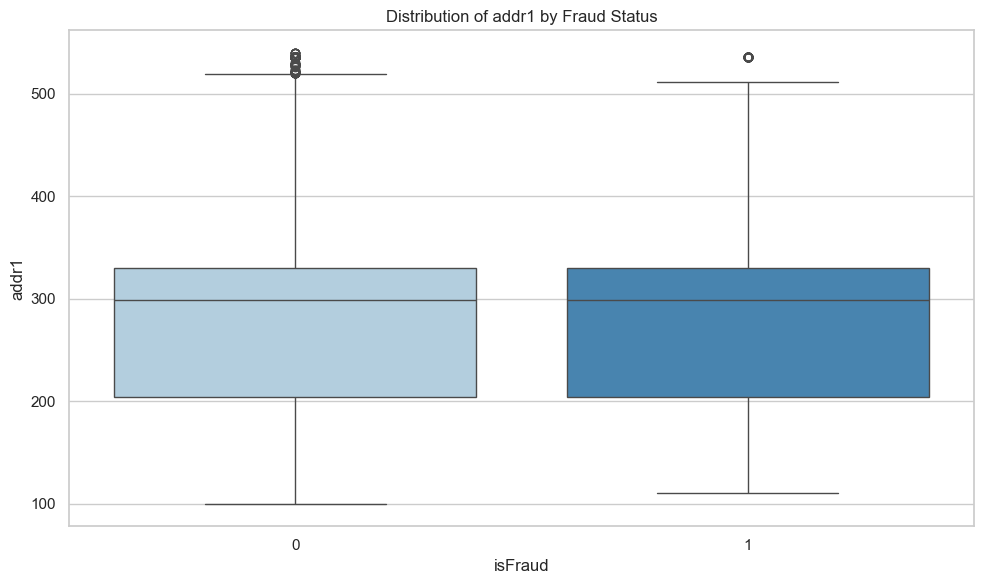

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


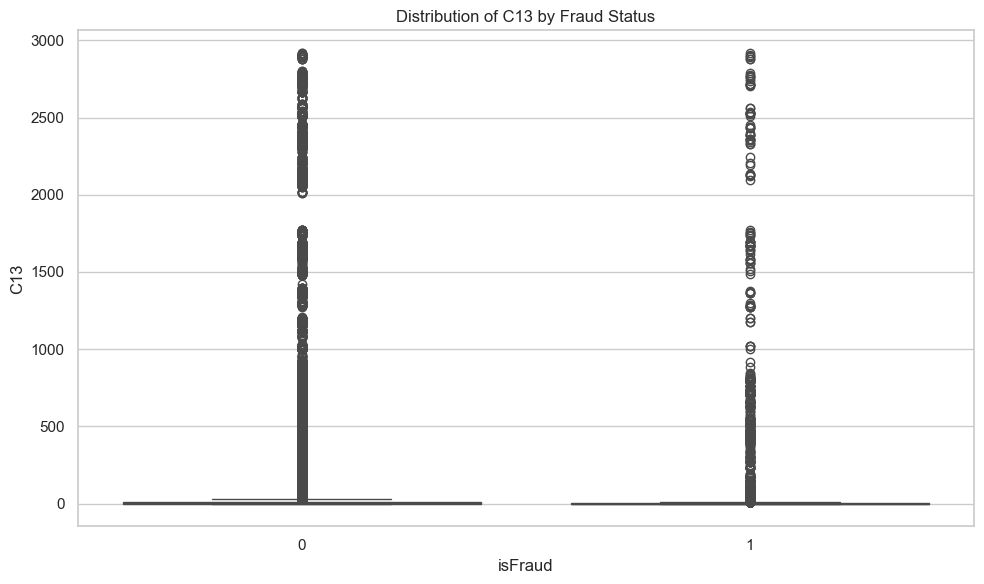

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


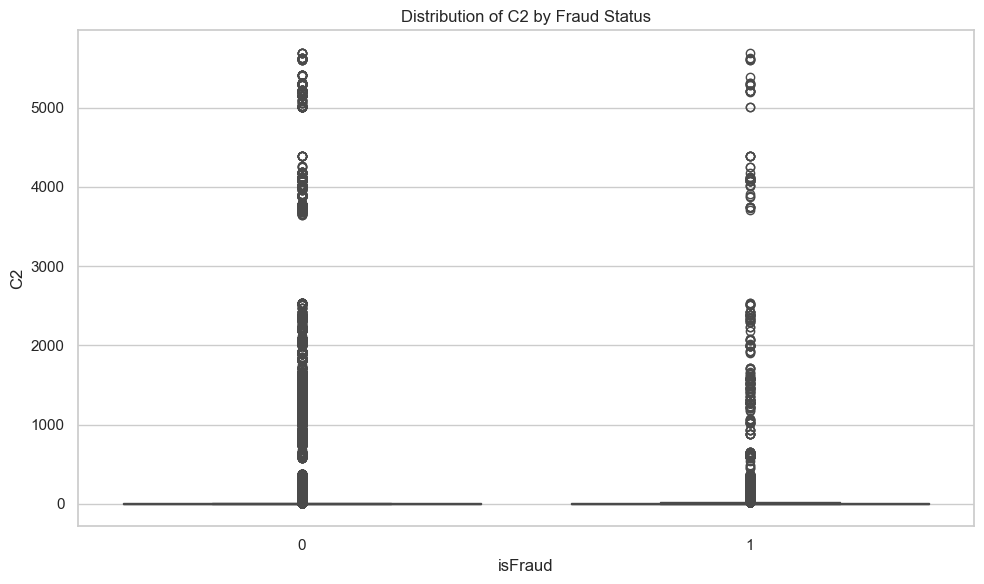

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


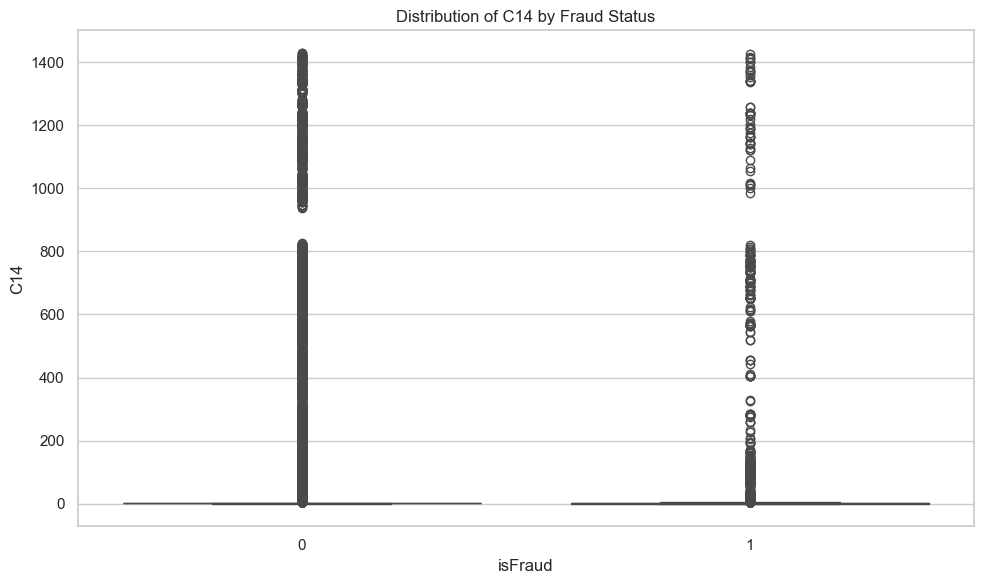

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


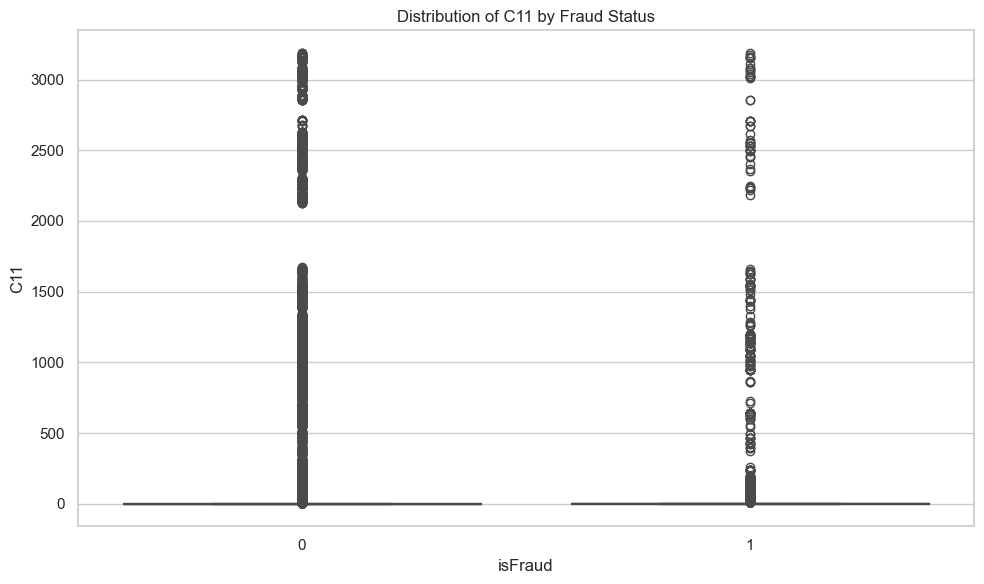

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


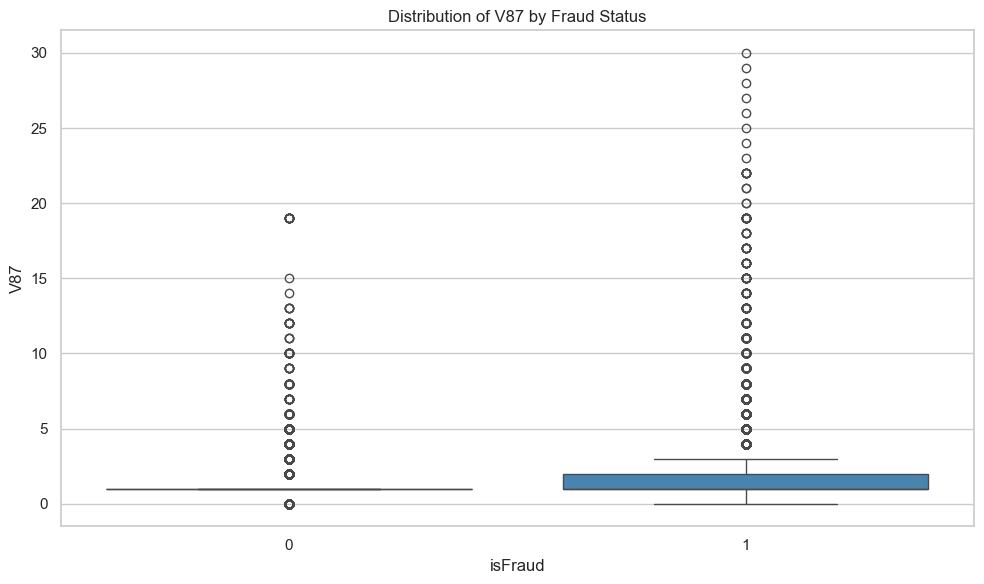

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


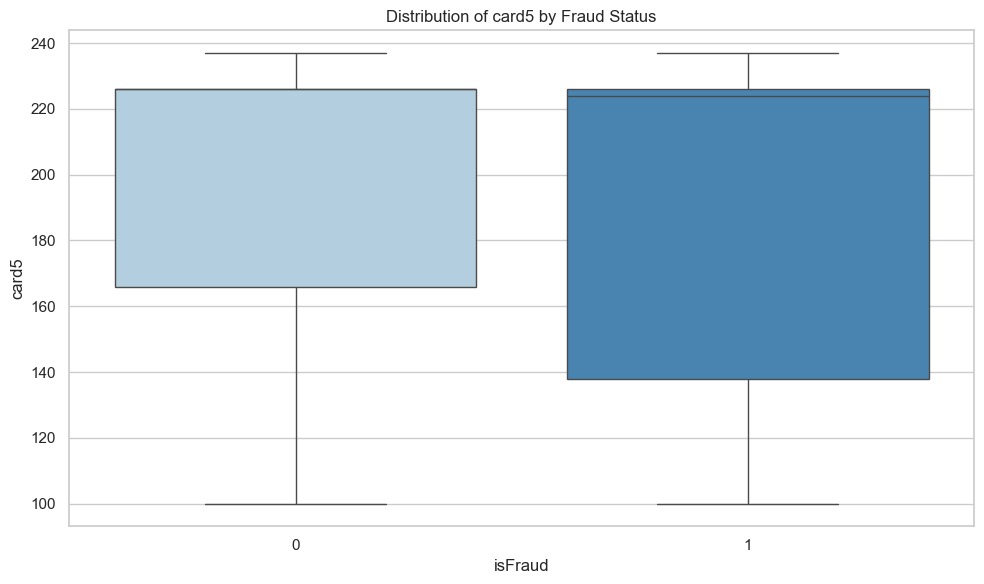

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


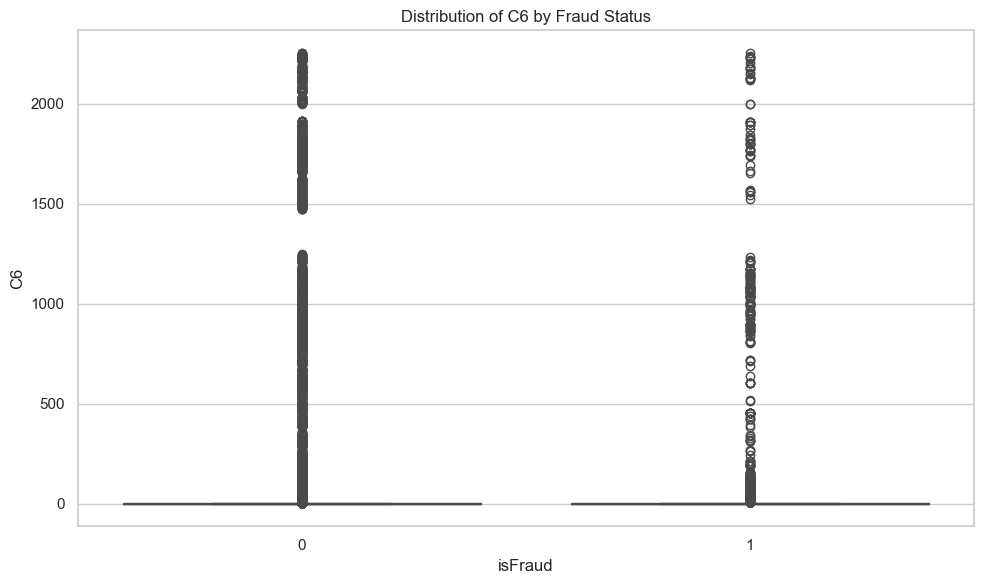

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


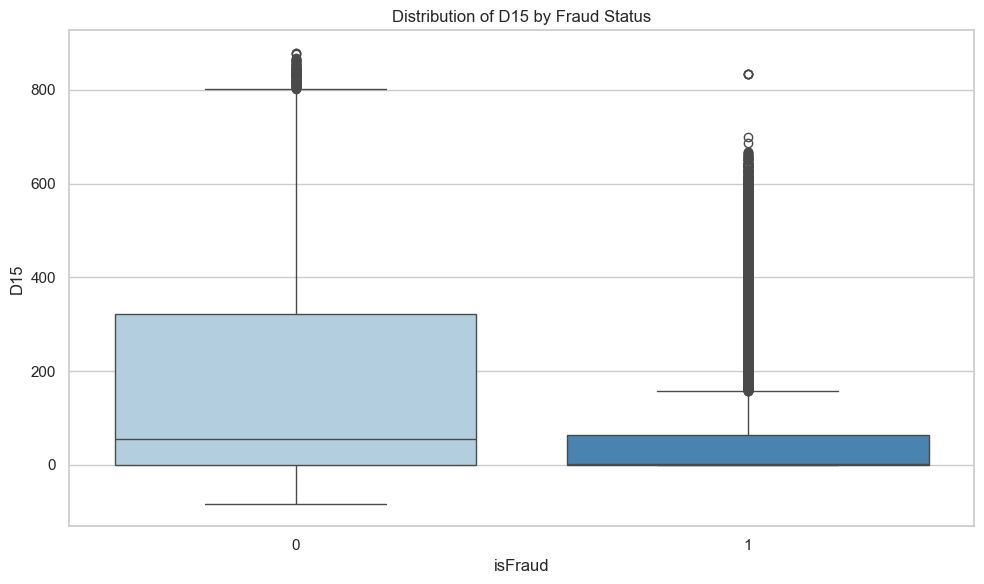

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


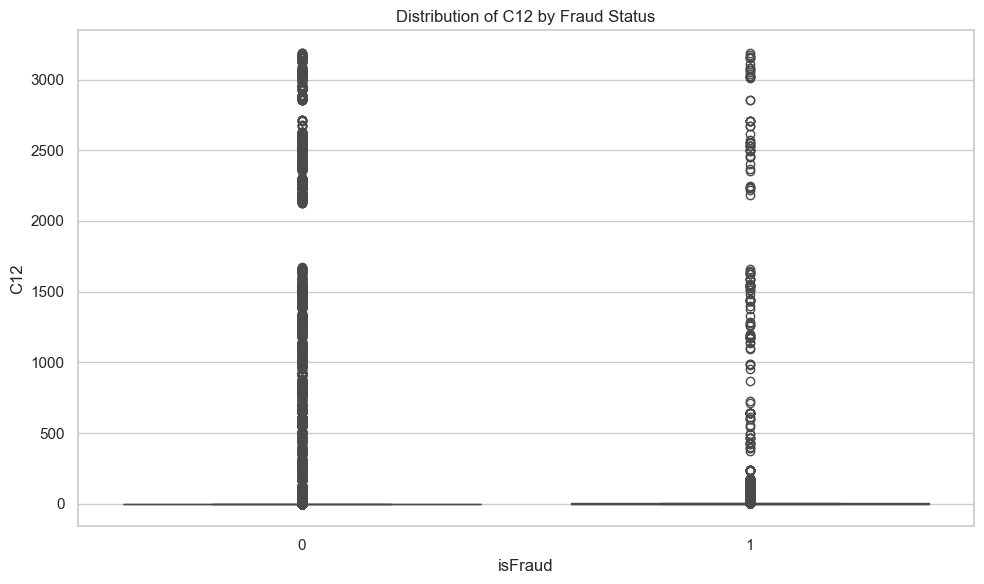

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


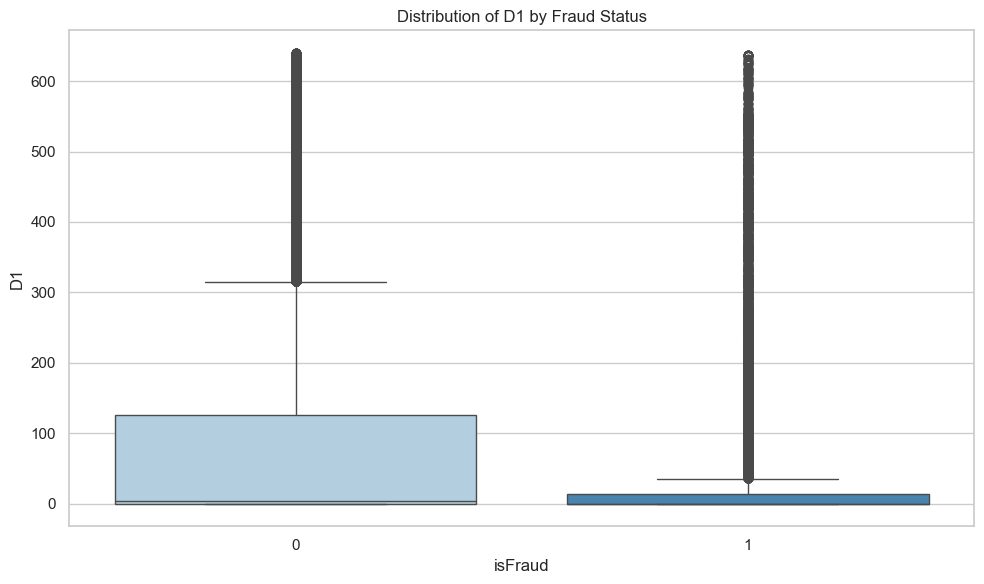

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


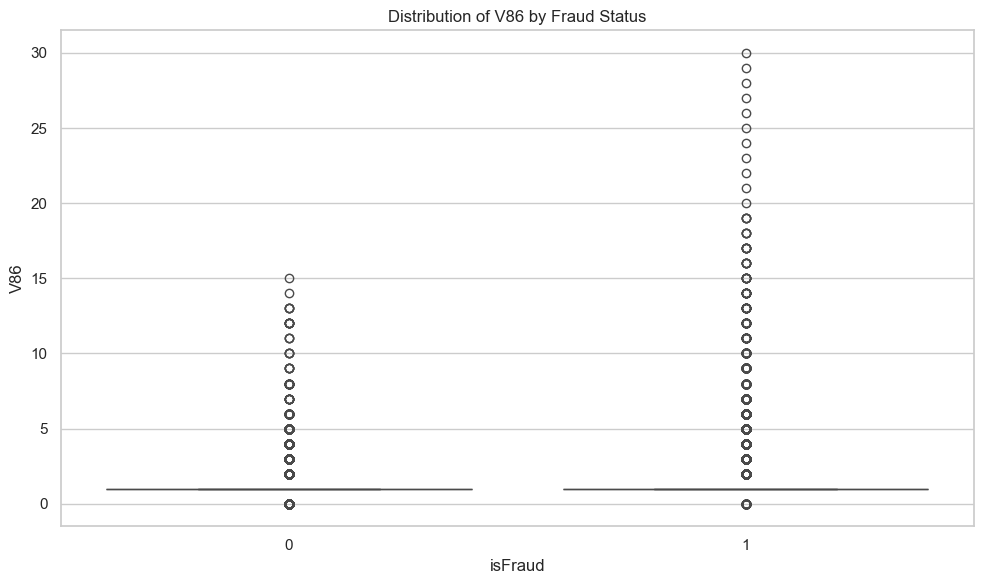

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


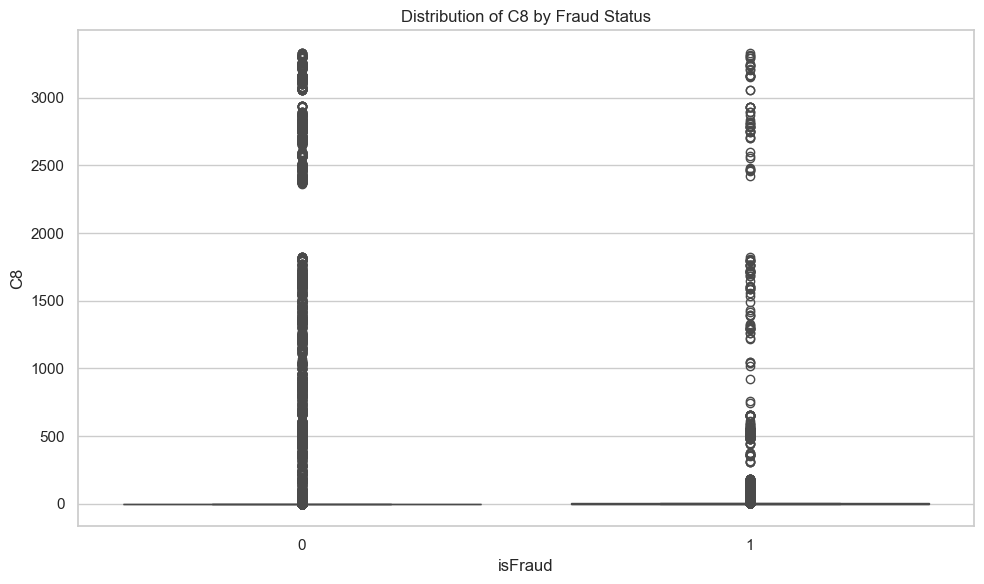

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


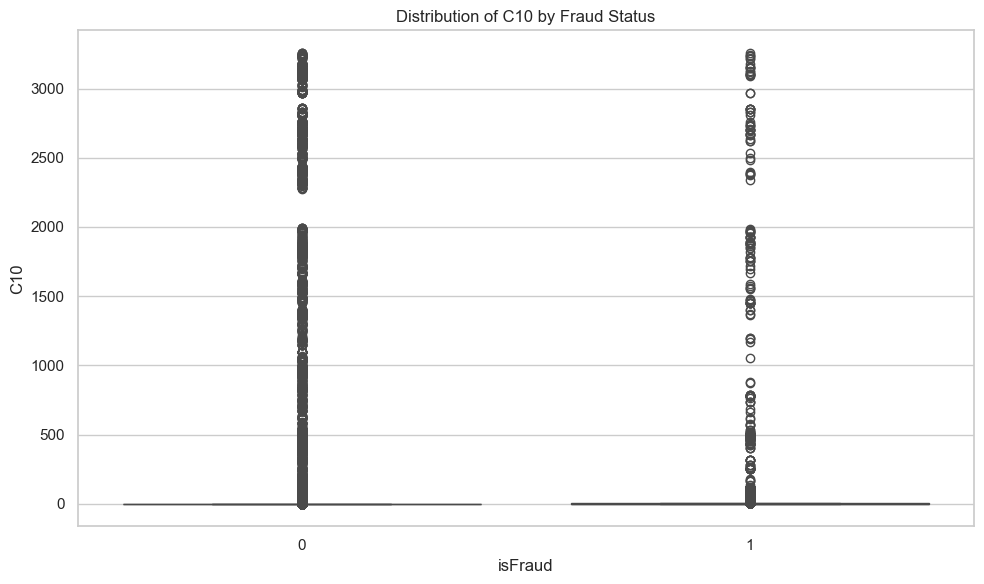

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


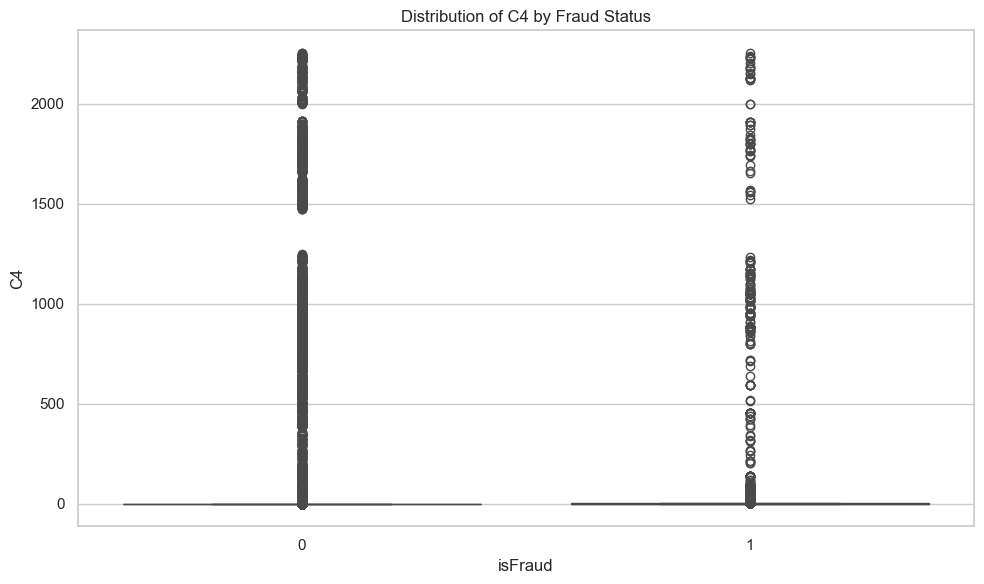

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


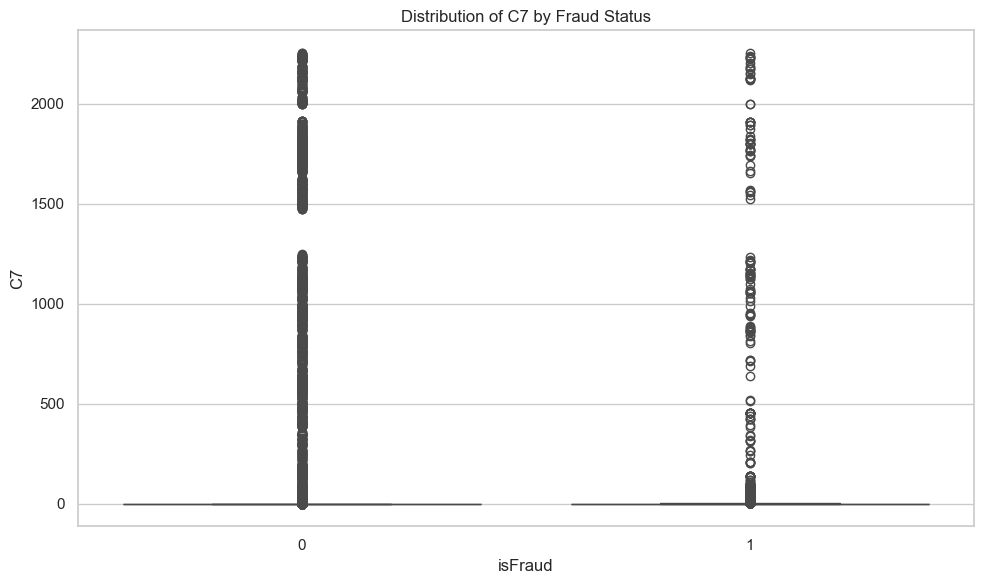

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


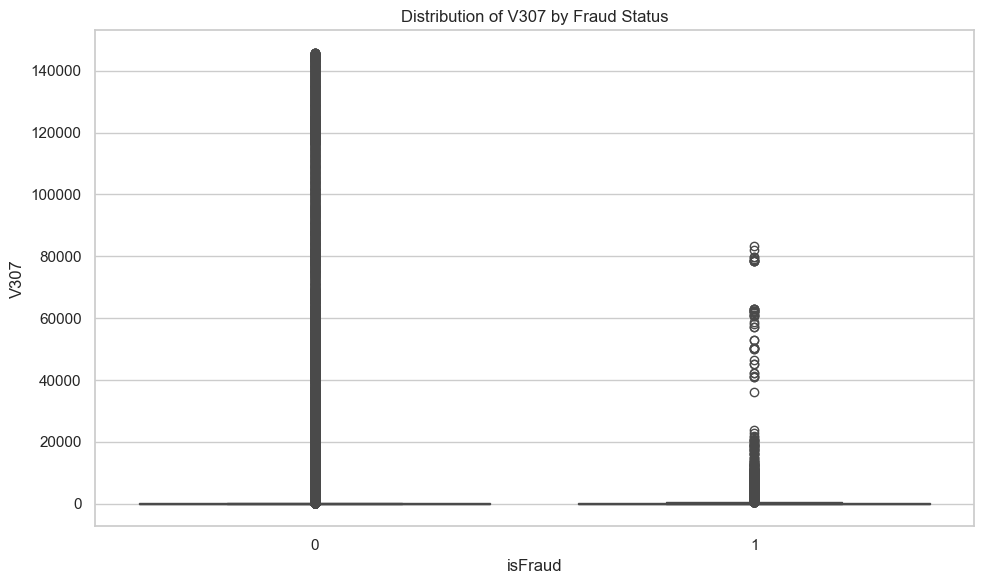

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


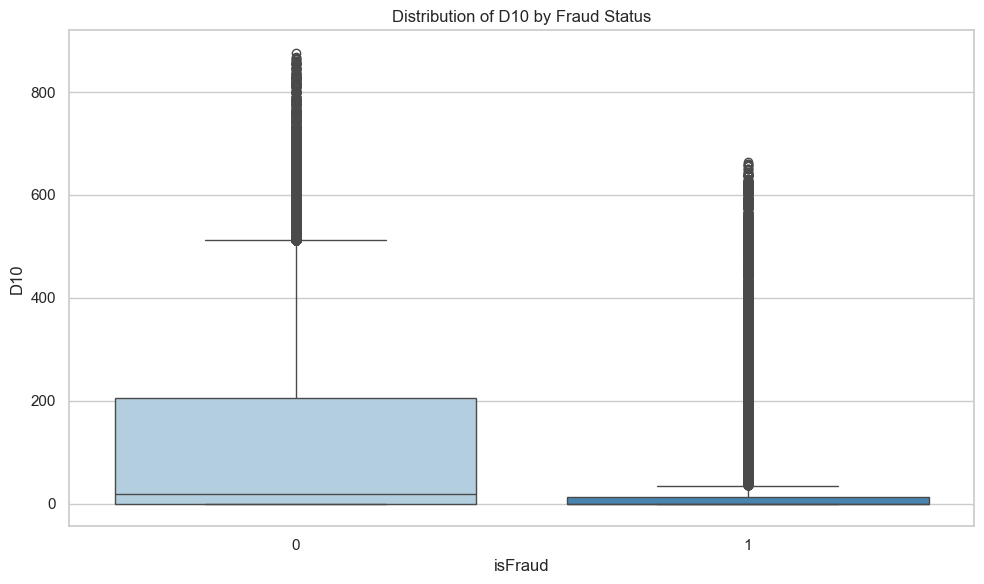

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_4632\279021027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')


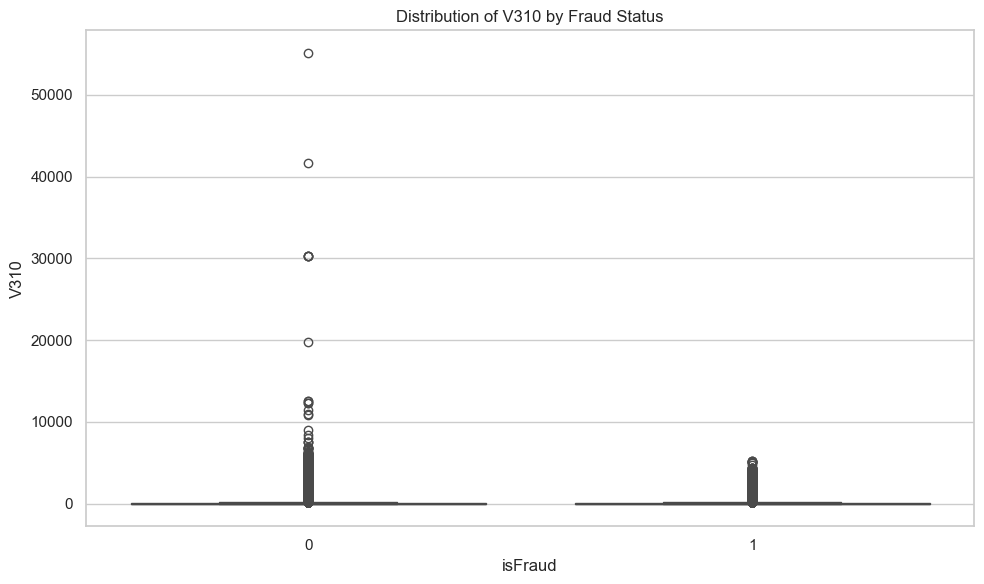

In [ ]:
top_feature_names = top_features['feature'].values
top_feature_names = [feature for feature in top_feature_names if feature != 'P_emaildomain_gmail.com']

data = train[top_feature_names+ ['isFraud']]
# Exclude 'P_emaildomain_gmail.com' from top_feature_names if it exists

# Set the plotting style
sns.set(style="whitegrid")
# Proceed with the plotting as before
import matplotlib.pyplot as plt
import seaborn as sns

for feature in top_feature_names:
    plt.figure(figsize=(10, 6))
    
    # Determine the plot type based on the variable type
    if data[feature].dtype == 'float64' or data[feature].dtype == 'int64':
        # Continuous Variable: Boxplot
        sns.boxplot(data=data, x='isFraud', y=feature, palette='Blues')
        plt.title(f'Distribution of {feature} by Fraud Status')
    else:
        # Categorical or dummy Variable: Countplot
        sns.countplot(data=data, x=feature, hue='isFraud', palette='Blues')
        plt.title(f'{feature} vs Fraud Count')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


Split data and scale. 

In [ ]:
# Separate features and target
X = credit_card_data.drop("Class", axis=1)
y = credit_card_data["Class"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The block below can take longer than 5 mins to run depending on you computer specs.

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        f"{model.__class__.__name__} Classification Report:\n",
        classification_report(y_test, y_pred),
    )
    print(
        f"{model.__class__.__name__} ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}\n"
    )


# Logistic Regression
logistic_model = LogisticRegression()
evaluate_model(logistic_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Decision Tree
dtree_model = DecisionTreeClassifier()
evaluate_model(dtree_model, X_train, y_train, X_test, y_test)

# Random Forest with parallel processing and fewer estimators
rforest_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
evaluate_model(rforest_model, X_train, y_train, X_test, y_test)

# # Gradient Boosting with fewer estimators
gboost_model = GradientBoostingClassifier(n_estimators=50)
evaluate_model(gboost_model, X_train, y_train, X_test, y_test)

# XGBoost with fewer estimators and parallel processing
xgb_model = XGBClassifier(
    n_estimators=50, eval_metric="logloss", n_jobs=-1, random_state=42
)
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

In [ ]:
# Define a function to store performance metrics for each model
def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        auc_score = (
            None  # Or use a default score like 0.5 if predict_proba is not available
        )

    f1_score = report["weighted avg"]["f1-score"]
    return auc_score, f1_score


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
}

# Initialize lists to store results
auc_scores = []
f1_scores = []
model_names = []

# Evaluate each model
for name, model in models.items():
    auc, f1 = evaluate_model_performance(
        model, X_train_scaled, y_train, X_test_scaled, y_test
    )
    auc_scores.append(auc)
    f1_scores.append(f1)
    model_names.append(name)

# Store results in a DataFrame
results = pd.DataFrame(
    {"Model": model_names, "ROC AUC Score": auc_scores, "F1 Score": f1_scores}
)

# Plotting metrics
metrics = {"ROC AUC Score": auc_scores, "F1 Score": f1_scores}
for metric_name, scores in metrics.items():
    plt.figure(figsize=(10, 5))
    plt.plot(model_names, scores, marker="o", label=metric_name)
    plt.xlabel("Model")
    plt.ylabel(metric_name)
    plt.title(f"Model {metric_name}")
    plt.legend()
    plt.grid(True)
    plt.show()